In [274]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [275]:
norm.pdf(0)

0.3989422804014327

In [276]:
beta = 1
omega = 0.35

def reward(x) -> float:
    return beta * np.exp(-1 * (x**2) / (2*(omega**2)))

In [277]:
x = np.arange(-1, 1, 0.01)

#y = [reward(i) for i in r]
#result #= reward(r)


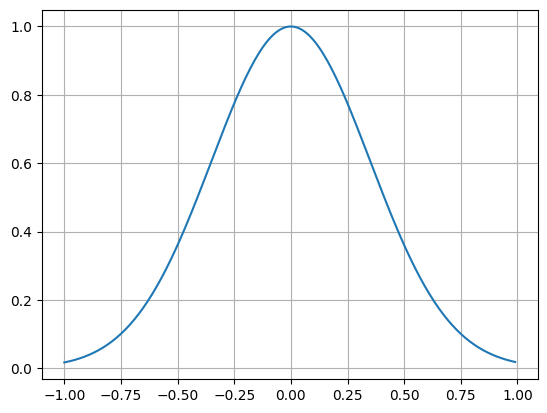

In [278]:
plt.plot(x, reward(x))
plt.grid()

In [279]:
reward(0.2)

0.8493658165683124